In [1]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE = 0.2
NOISE = 0.2
ALPHA = 0.1
N_SAMPLES = 1000
EPOCHS=20001

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.jet

plt.rcParams.update(params)

In [3]:
X, y  = datasets.make_moons(n_samples=N_SAMPLES,
                            shuffle=True,
                            noise=NOISE,
                            random_state=RANDOM_STATE)

X.shape, y.shape

((1000, 2), (1000,))

In [4]:
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

In [5]:
data_df = pd.DataFrame(X, columns = ['A', 'B']) # Put X in a dataframe
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


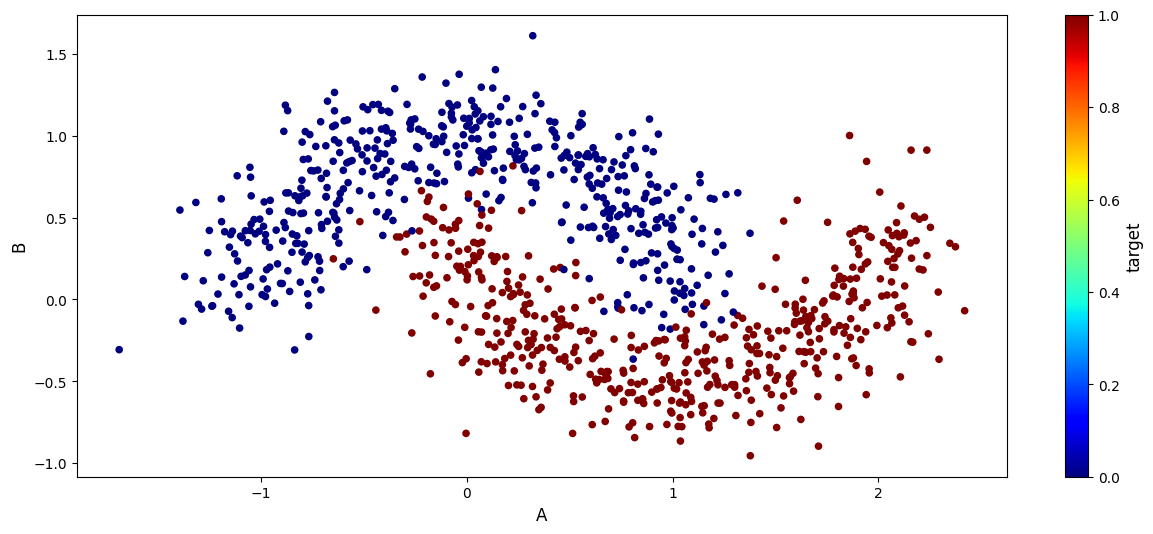

In [8]:
data_df.plot.scatter('A', 'B', s = 20, c = 'target', cmap = plt.cm.jet);

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= TEST_SIZE, stratify = y, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [10]:
def fn_sigmoid(z):
  return 1/(1+np.exp(-z))

whenever you code a function check it by running

In [11]:
fn_sigmoid(np.array([[-1., 0., 1.],[-np.inf, 0., np.inf]]))

array([[0.26894142, 0.5       , 0.73105858],
       [0.        , 0.5       , 1.        ]])

In [12]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(a):
    return 1.0 - (np.tanh(a))**2

In [13]:
fn_activ(np.array([[-1., 0., 1.],[-np.inf, 0., np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [14]:
1.0 - (np.tanh(0.5))**2

np.float64(0.7864477329659274)

In [15]:
fn_activ_prime(0.5)

np.float64(0.7864477329659274)

In [16]:
fn_activ_prime(np.array([[-1., 0., 1.],[-np.inf, 0., np.inf]]))

array([[0.41997434, 1.        , 0.41997434],
       [0.        , 1.        , 0.        ]])

In [17]:
def predict(model, X_p):
      W1 = model['W1']
      b1 = model['b1']
      W2 = model['W2']
      b2 = model['b2']
      ### Forward Propagation
      ## Layer-1
      z1 = X_p.dot(W1) + b1   # Aggreagtion
      a1 = fn_activ(z1)     # Activation function

      ## Layer-2
      z2 = a1.dot(W2) + b2  # Aggregaion
      a2 = fn_sigmoid(z2)   # Activation function
      return a2 >= 0.5

In [18]:
def calculate_loss(model, X_l, y_l):
      W1 = model['W1']
      b1 = model['b1']
      W2 = model['W2']
      b2 = model['b2']
      m = X_l.shape[0]

      ### Forward Propagation
      ## Layer-1
      z1 = X_l.dot(W1) + b1   # Aggreagtion
      a1 = fn_activ(z1)     # Activation function

      ## Layer-2
      z2 = a1.dot(W2) + b2  # Aggregaion
      a2 = fn_sigmoid(z2)   # Activation function
      loss = -(y_l * np.log(a2)).sum()/ m
      return loss

In [19]:
loss_hist = {}

In [20]:
def build_model(nn_hdim,X, y, epochs= EPOCHS, alpha= ALPHA):

    m, nn_input_dim = X.shape
    nn_output_dim = y.shape[1]

    # Weights :
    # Corrected: Multiply the random values by the scaling factor
    W1 = rng.random((nn_input_dim, nn_hdim), dtype=np.float32) * (1/np.sqrt(nn_input_dim))
    W2 = rng.random((nn_hdim, nn_output_dim), dtype=np.float32) * (1/np.sqrt(nn_hdim)) # Changed nn_input_dim to nn_output_dim for W2 shape

    # bias
    # Corrected: Typo in np.zeroes, should be np.zeros
    b1 = np.zeros((1, nn_hdim), dtype=np.float32)
    b2 = np.zeros((1,nn_output_dim), dtype=np.float32)

    # Moved initialization outside the loop to avoid re-initializing every epoch
    curr_loss , loss, epochs_list = [], [], [] # Renamed epochs to epochs_list to avoid conflict with function parameter

    for i in range(0, epochs):

      ### Forward Propagation
      ## Layer-1
      z1 = X.dot(W1) + b1   # Aggreagtion
      a1 = fn_activ(z1)     # Activation function


      ## Layer-2
      z2 = a1.dot(W2) + b2  # Aggregaion
      a2 = fn_sigmoid(z2)   # Activation function


      ### Back Propagation
      ## Possible ERROR : The shape if the a2 and y do not match. Shape of a2 is:
      #### --------------
      ## Layer 2 :
      #### --------------
      assert(a2.shape == y.shape), f'a2 shape : {a2.shape}, y shape:{y.shape}'
      dz2 = a2 - y

      dW2 = (a1.T).dot(dz2)
      assert (dW2.shape == W2.shape), f'dW2 shape : {dW2.shape}, W2 shape:{W2.shape}'

      db2 = np.sum(dz2, axis=0, keepdims=True)
      assert (db2.shape == b2.shape), f'db2 shape : {db2.shape}  , b2 shape : {b2.shape}'

      da1 = dz2.dot(W2.T)
      assert( da1.shape == a1.shape), f'da1 shape: {da1.shape}, a1 shape : {a1.shape}'

      #### --------------
      ## Layer 1 :
      #### --------------
      dz1 = da1 * fn_activ_prime(z1)     # element wise multiplication not the dot product
      assert (dz1.shape == z1.shape), f'dz1 shape : {dz1.shape}, z1 shape : {z1.shape}'

      dW1 = (X.T).dot(dz1)
      assert (dW1.shape == W1.shape), f'dW1 shape: {dW1.shape}, W1 shape: {W1.shape}'

      db1 = np.sum(dz1, axis=0, keepdims=True)
      assert (db1.shape == b1.shape), f'db1 shape: {db1.shape}, b1 shape: {b1.shape}'


      #######################
      ### Gradient Update ###
      #######################
      W1 += -alpha * dW1 / m
      b1 += -alpha * db1 / m
      W2 += -alpha * dW2 / m
      b2 += -alpha * db2 / m # Corrected: Should update b2 with db2

      model = {'W1':W1, 'b1': b1, 'W2': W2, 'b2': b2}

      if i%100 == 0:
        curr_loss = calculate_loss(model, X, y)
        loss.append(curr_loss)
        epochs_list.append(i) # Append to epochs_list

      if i%1000 == 0 :
        print(f'INFO : Loss after {i:>5d} is {curr_loss:8.5f}')

    # update loss
    loss_hist['epoch'] = epochs_list # Use epochs_list
    loss_hist['loss'] = loss

    return model

In [21]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [22]:
model = build_model(4, X_train, y_train)
display(model)

INFO : Loss after     0 is  0.29173
INFO : Loss after  1000 is  0.14811
INFO : Loss after  2000 is  0.11359
INFO : Loss after  3000 is  0.07976
INFO : Loss after  4000 is  0.05990
INFO : Loss after  5000 is  0.04288
INFO : Loss after  6000 is  0.03557
INFO : Loss after  7000 is  0.03220
INFO : Loss after  8000 is  0.03051
INFO : Loss after  9000 is  0.02960
INFO : Loss after 10000 is  0.02906
INFO : Loss after 11000 is  0.02872
INFO : Loss after 12000 is  0.02849
INFO : Loss after 13000 is  0.02833
INFO : Loss after 14000 is  0.02822
INFO : Loss after 15000 is  0.02813
INFO : Loss after 16000 is  0.02806
INFO : Loss after 17000 is  0.02801
INFO : Loss after 18000 is  0.02795
INFO : Loss after 19000 is  0.02791
INFO : Loss after 20000 is  0.02786


{'W1': array([[ 3.41913678,  2.29920451,  3.42614202,  2.91820085],
        [ 3.1263271 , -1.01549898, -1.46162663, -1.17626114]]),
 'b1': array([[-2.359935 ,  1.60915  , -4.3659797,  1.4973549]], dtype=float32),
 'W2': array([[-7.14399374],
        [ 3.3231054 ],
        [ 7.22840979],
        [ 3.93883847]]),
 'b2': array([[-0.49130005]], dtype=float32)}

<Axes: xlabel='epoch'>

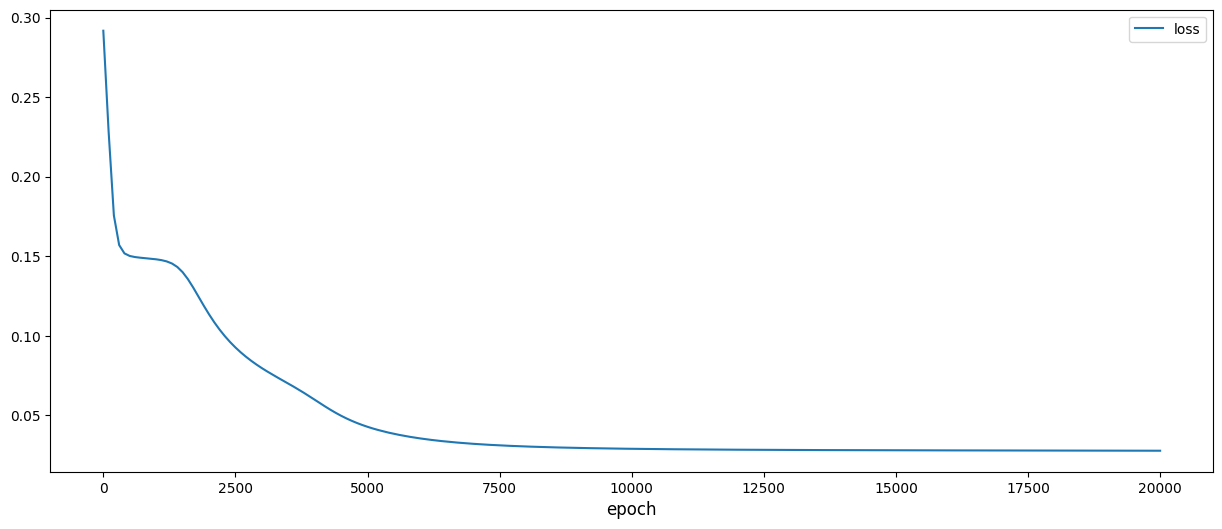

In [23]:
pd.DataFrame(loss_hist).plot(x= 'epoch', y='loss')

### Train Predictions

In [24]:
y_pred = predict(model, X_train)

print(f'Accuracy : {accuracy_score ( y_train, y_pred):7.4f}')

Accuracy :  0.9812


In [25]:
y_pred = predict(model, X_test)

print(f'Accuracy : {accuracy_score ( y_test, y_pred):7.4f}')

Accuracy :  0.9650


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[98,  2],
       [ 5, 95]])

In [28]:
loss_df = pd.DataFrame(loss_hist)
loss_df.head()

,epoch,loss
0,0,0.291726
1,100,0.228585
2,200,0.175660
3,300,0.157060
4,400,0.151830


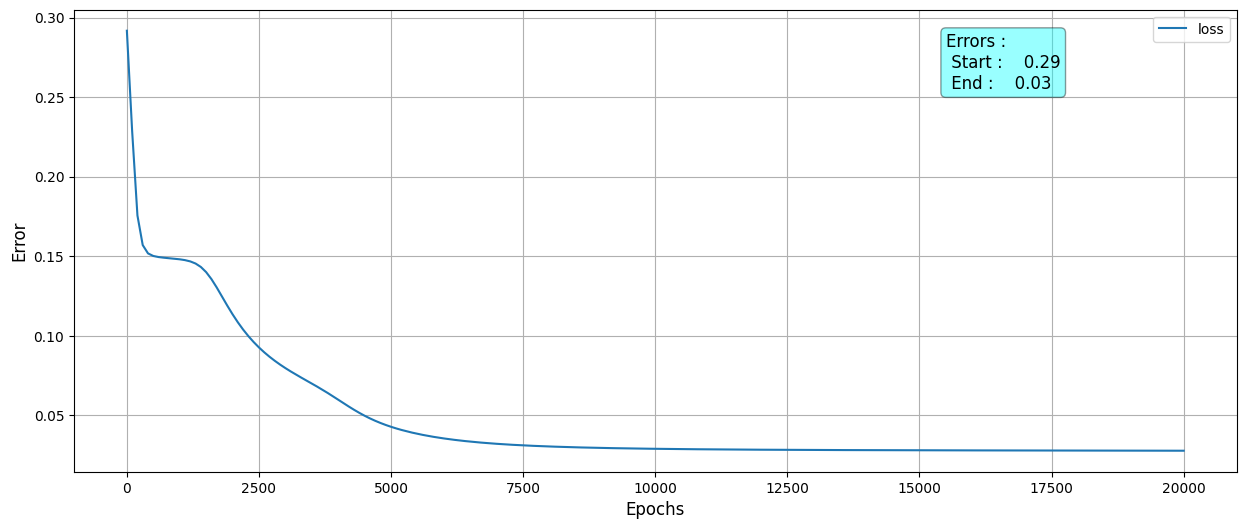

In [30]:
fig, ax = plt.subplots()
loss_df.plot(x='epoch', y='loss', ax=ax)
txtstr = "Errors : \n Start : {:7.2f}\n End : {:7.2f}".format(loss_df.iloc[0]['loss'], loss_df.iloc[-1]['loss'])

props = dict(boxstyle = 'round', facecolor='cyan', alpha=0.4)

ax.text(0.75, 0.95, txtstr, transform= ax.transAxes, fontsize = 12, verticalalignment ='top', bbox = props)

ax.set_xlabel('Epochs')
ax.set_ylabel('Error')

ax.grid()

In [31]:
y_pred = predict(model, X_train)

print(f'Accuracy : {accuracy_score ( y_train, y_pred):7.4f}')

Accuracy :  0.9812


In [32]:
y_pred = predict(model, X_test)

print(f'Accuracy : {accuracy_score ( y_test, y_pred):7.4f}')

Accuracy :  0.9650


In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[98,  2],
       [ 5, 95]])

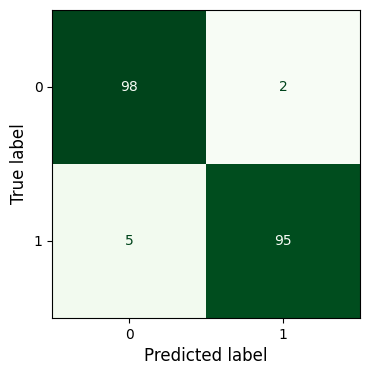

In [38]:
# Create plot object of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

# initialize figure
fig, ax = plt.subplots(figsize = (4,4))

#Plot
disp.plot(ax = ax, cmap = 'Greens', colorbar=False)
# plt.grid()
plt.show();

In [39]:
def fn_plot_decision_boundary(pred_func, X_tr, y_tr, X_ts, y_ts):
    '''
        pred_func : function making predictions using Train data,
        X_tr : training,
        y_tr : Training Labels,
        X_ts : Testing,
        y_ts = Testing Labels
    '''
    fig, ax = plt.subplots(figsize = (15,5))
    dm = 0.05
    x_min , x_max = X_tr[:,0].min() - 0.5, X_tr[:,0].max() + 0.5
    y_min , y_max = X_tr[:,1].min() - 0.5, X_tr[:,1].max() + 0.5

    x1, y1 = np.meshgrid(np.arange(x_min, x_max, dm), np.arange(y_min, y_max, dm))

    XX = np.c_[x1.ravel(), y1.ravel()]

    Z = pred_func(XX)
    Z = Z.reshape(x1.shape)

    ax.contourf(x1, y1, Z, alpha = 0.6, cmap= plt.cm.coolwarm)
    ax.scatter(X_tr[:,0], X_tr[:,1] , c= y_tr, s=15, edgecolor = 'k', cmap = plt.sm.bwr)
    ax.scatter(X_tr[:,0], X_ts[:,1] , c= y_ts, s=50, marker = '*',edgecolor = 'k', cmap = plt.sm.Paired)

In [39]:
fn_plot_decision_boundary